In [1]:
from sqlalchemy import create_engine
import pandas as pd
import yaml
import numpy as np
import sklearn
import os
from os.path import isfile
from pandas_profiling import ProfileReport

/home/shah/miniconda3/envs/selenium_project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fb_df = pd.read_json("data/products_table.json")

In [3]:
fb_df.head()

,id,product_name,category,product_description,price,location,page_id,create_time
0,ac2140ae-f0d5-4fe7-ac08-df0f109fd734,"Second-Hand Sofas, Couches & Armchairs for Sal...",N/A,N/A,N/A,N/A,1426592234,2022-02-26
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire",1426704584,2022-02-26
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland",1426704579,2022-02-26
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire",1426704576,2022-02-26
4,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset",1426704575,2022-02-26


In [ ]:
prof = ProfileReport(fb_df)
prof.to_file(output_file='output.html')

In [4]:
fb_df.columns


Index(['id', 'product_name', 'category', 'product_description', 'price',
       'location', 'page_id', 'create_time'],
      dtype='object')

In [5]:
fb_df.isna()

,id,product_name,category,product_description,price,location,page_id,create_time
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8086,False,False,False,False,False,False,False,False
8087,False,False,False,False,False,False,False,False
8088,False,False,False,False,False,False,False,False
8089,False,False,False,False,False,False,False,False


In [6]:
fb_df.replace('N/A', np.nan, inplace=True)

In [7]:
fb_df.isna()

,id,product_name,category,product_description,price,location,page_id,create_time
0,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8086,False,False,False,False,False,False,False,False
8087,False,False,True,True,True,True,False,False
8088,False,False,False,False,False,False,False,False
8089,False,False,False,False,False,False,False,False


In [8]:
(fb_df.isnull().sum()/len(fb_df))*100

id                      0.00000
product_name            0.00000
category               11.55605
product_description    11.55605
price                  11.55605
location               11.55605
page_id                 0.00000
create_time             0.00000
dtype: float64

In [9]:
fb_df[fb_df['price'].isna()].T

,0,12,13,24,25,53,89,96,106,132,...,8039,8053,8059,8060,8062,8067,8072,8076,8081,8087
id,ac2140ae-f0d5-4fe7-ac08-df0f109fd734,b9b8befe-8472-4a19-8bdc-bd583cf7f5ba,8c9e3451-34cf-4b64-ba10-d5facaba6782,acae6354-d293-40a3-9945-b61ee13deef2,4b6ce77f-de16-41f9-af80-6a3c822bf523,18e00c00-a7fe-4775-9899-5f3c70584c2c,72e3ff76-2f17-47ba-937a-70edd5f71de7,66b30483-962b-4d37-8ee9-57ede0177c0f,c756a718-c37a-400b-bddf-6792c2bf450d,f0779380-f799-44d9-b7f1-c0a3b1175b0c,...,f90bc055-6357-40dc-a388-978804ef5254,c7553cf4-36ce-494c-91d4-103b8854ba53,8b967377-8e82-4fd3-898d-19464b854cde,381cb710-dbb7-4486-80f7-3731e6c3fb80,326ee748-18b8-45e5-8246-0c606ed0df8d,b1f8836f-99aa-41ee-90b1-d3ace071f04c,8471377a-4561-4bef-9865-8a1aa4c713d5,5f6977d5-f713-479c-a102-7066dcb566e9,db36f078-7a12-4b5a-974d-3229be45e38e,4bace77b-1c58-4ae5-b72f-10aead62f817
product_name,"Second-Hand Sofas, Couches & Armchairs for Sal...","Other Household Goods for Sale in Hersham, Sur...","Second-Hand Curtains, Blinds & Window Fixtures...",Second-Hand Double Beds & Bed Frames for Sale ...,Other Baby Related Stuff for Sale in Newcastle...,Second-Hand Bedroom Dressers & Chest of Drawer...,Second-Hand Double Beds & Bed Frames for Sale ...,Second-Hand Dining Tables & Chairs for Sale in...,"Other Household Goods for Sale in Dunmurry, Be...",Second-Hand Dining Tables & Chairs for Sale in...,...,Video Game Console Controllers for Sale in Bat...,Second-Hand Xbox One Consoles for Sale in Shel...,Used PS5 (Sony PlayStation 5) for Sale in Bish...,"Second-Hand Video Games for Sale in Uxbridge, ...",Used Xbox 360 Consoles for Sale in Stoke-on-Tr...,"Second-Hand PS4 for Sale in Cambridge, Cambrid...","Other Video Games Consoles in Norwich, Norfolk...",Used Xbox 360 Consoles for Sale in Stoke-on-Tr...,Second-Hand Sony PS3 Consoles for Sale in Dudl...,Used PS5 (Sony PlayStation 5) for Sale in Berk...
category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
page_id,1426592234,1426704479,1426704471,1426701764,1426705950,1426508272,1426704518,1426701662,1426701617,1426702670,...,1426661768,1426701621,1426701220,1426701183,1426701058,1426700846,1426700347,1426700070,1426699828,1426672264
create_time,2022-02-26 00:00:00,2022-02-26 00:00:00,2022-02-26 00:00:00,2022-02-26 00:00:00,2022-02-26 00:00:00,2022-02-26 00:00:00,2022-02-26 00:00:00,2022-02-26 00:00:00,2022-02-26 00:00:00,2022-02-26 00:00:00,...,2022-02-28 00:00:00,2022-02-28 00:00:00,2022-02-28 00:00:00,2022-02-28 00:00:00,2022-02-28 00:00:00,2022-02-28 00:00:00,2022-02-28 00:00:00,2022-02-28 00:00:00,2022-02-28 00:00:00,2022-02-28 00:00:00


In [10]:
fb_df.drop(fb_df.index[935],inplace=True)

In [11]:
fb_df.drop(fb_df[fb_df['price'].isna()].index,inplace=True)

In [12]:
fb_df

,id,product_name,category,product_description,price,location,page_id,create_time
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire",1426704584,2022-02-26
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland",1426704579,2022-02-26
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire",1426704576,2022-02-26
4,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset",1426704575,2022-02-26
5,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",New Design Shannon Corner sofa 5 Seater Avail...,£450.00,"Delph, Manchester",1426704570,2022-02-26
...,...,...,...,...,...,...,...,...
8085,c4148656-78a9-4f3e-b393-134fdc5ef900,Sony PlayStation VR Move Bundle | in Acocks Gr...,Video Games & Consoles / Consoles / PS4 (Sony ...,Sony PlayStation VR Move Bundle353CASH ON COLL...,£260.00,"Acocks Green, West Midlands",1422159237,2022-02-28
8086,564e3411-768d-4250-a624-b119d696f103,"Playstation VR V2 Bundle | in Acocks Green, We...",Video Games & Consoles / Consoles / PS4 (Sony ...,Playstation VR V2 Bundle355CASH ON COLLECTION ...,£235.00,"Acocks Green, West Midlands",1422159464,2022-02-28
8088,2b0a652b-46a2-4297-b619-5efeeb222787,"Oculus quest 2 256gb | in Montrose, Angus | Gu...",Video Games & Consoles / Other Video Games & C...,Pick up only £250Comes with two pistols stocks...,£250.00,"Montrose, Angus",1426668818,2022-02-28
8089,719fd40a-870e-4144-b324-55dff2e66fb4,Logitech driving force shifter | in Carrickfer...,Video Games & Consoles / Video Game Accessorie...,Bought at christmas from currys retailing at £...,£30.00,"Carrickfergus, County Antrim",1426699715,2022-02-28


In [13]:
fb_df.dtypes

id                             object
product_name                   object
category                       object
product_description            object
price                          object
location                       object
page_id                         int64
create_time            datetime64[ns]
dtype: object

In [14]:
fb_df['price'] = fb_df['price'].apply(
            lambda x: x.strip("£").replace(',',''))
fb_df['price'] = fb_df['price'].astype('float64')

In [15]:
def remove_price_outliers(df):
    
    df = df[df['price'] < 10000]
    df = df[df['price'] > 0.1]
    return df

fb_df = remove_price_outliers(fb_df)

In [16]:
fb_df.dtypes

id                             object
product_name                   object
category                       object
product_description            object
price                         float64
location                       object
page_id                         int64
create_time            datetime64[ns]
dtype: object

In [17]:
#split categories into main using lambda
fb_df['main_category'] = fb_df['category'].apply(
    lambda x: x.split("/")[0].strip())

In [18]:
fb_df

,id,product_name,category,product_description,price,location,page_id,create_time,main_category
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",5.0,"Wokingham, Berkshire",1426704584,2022-02-26,Home & Garden
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,20.0,"Inverness, Highland",1426704579,2022-02-26,Home & Garden
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,20.0,"Skegness, Lincolnshire",1426704576,2022-02-26,Home & Garden
4,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,115.0,"Radstock, Somerset",1426704575,2022-02-26,Home & Garden
5,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",New Design Shannon Corner sofa 5 Seater Avail...,450.0,"Delph, Manchester",1426704570,2022-02-26,Home & Garden
...,...,...,...,...,...,...,...,...,...
8085,c4148656-78a9-4f3e-b393-134fdc5ef900,Sony PlayStation VR Move Bundle | in Acocks Gr...,Video Games & Consoles / Consoles / PS4 (Sony ...,Sony PlayStation VR Move Bundle353CASH ON COLL...,260.0,"Acocks Green, West Midlands",1422159237,2022-02-28,Video Games & Consoles
8086,564e3411-768d-4250-a624-b119d696f103,"Playstation VR V2 Bundle | in Acocks Green, We...",Video Games & Consoles / Consoles / PS4 (Sony ...,Playstation VR V2 Bundle355CASH ON COLLECTION ...,235.0,"Acocks Green, West Midlands",1422159464,2022-02-28,Video Games & Consoles
8088,2b0a652b-46a2-4297-b619-5efeeb222787,"Oculus quest 2 256gb | in Montrose, Angus | Gu...",Video Games & Consoles / Other Video Games & C...,Pick up only £250Comes with two pistols stocks...,250.0,"Montrose, Angus",1426668818,2022-02-28,Video Games & Consoles
8089,719fd40a-870e-4144-b324-55dff2e66fb4,Logitech driving force shifter | in Carrickfer...,Video Games & Consoles / Video Game Accessorie...,Bought at christmas from currys retailing at £...,30.0,"Carrickfergus, County Antrim",1426699715,2022-02-28,Video Games & Consoles


In [19]:
#remove special characters from colums
fb_df['product_name'] = fb_df['product_name'].str.lower().replace('\W+', '_', regex=True)
#category_encodings = pd.get_dummies(
 #           fb_df['product_name'], prefix='product_name', drop_first=True)
#fb_df = pd.concat(
 #           [fb_df, category_encodings], axis=1)
fb_df['product_description'] = fb_df['product_description'].str.lower().replace('\W+', '_', regex=True)
#category_encodings = pd.get_dummies(
 #           fb_df['product_description'], prefix='product_description', drop_first=True)
#fb_df = pd.concat(
  #          [fb_df, category_encodings], axis=1)
fb_df['category'] = fb_df['category'].str.lower().replace('\W+', '_', regex=True)
#category_encodings = pd.get_dummies(
 #           fb_df['category'], prefix='category', drop_first=True)
fb_df['main_category'] = fb_df['main_category'].str.lower().replace('\W+', '_', regex=True)
#category_encodings = pd.get_dummies(
 #           fb_df['main_category'], prefix='main_category', drop_first=True)
fb_df['location'] = fb_df['location'].str.lower().replace('\W+', '_', regex=True)
#category_encodings = pd.get_dummies(
 #           fb_df['location'], prefix='location', drop_first=True)
#fb_df = pd.concat(
 #           [fb_df, category_encodings], axis=1)


In [20]:
fb_df

,id,product_name,category,product_description,price,location,page_id,create_time,main_category
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,mirror_wall_art_in_wokingham_berkshire_gumtree,home_garden_dining_living_room_furniture_mirro...,mirror_wall_art_posted_by_nisha_in_dining_livi...,5.0,wokingham_berkshire,1426704584,2022-02-26,home_garden
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,stainless_steel_food_steamer_in_inverness_high...,home_garden_other_household_goods,morphy_richard_s_model_no_48755_stainless_stee...,20.0,inverness_highland,1426704579,2022-02-26,home_garden
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,sun_loungers_in_skegness_lincolnshire_gumtree,home_garden_garden_patio_outdoor_settings_furn...,i_have_2_of_these_collection_only_as_i_don_t_d...,20.0,skegness_lincolnshire,1426704576,2022-02-26,home_garden
4,59948726-29be-4b35-ade5-bb2fd7331856,coffee_side_table_from_ammunition_ammo_box_hai...,home_garden_dining_living_room_furniture_other,great_reclaimed_army_ammunition_box_used_as_co...,115.0,radstock_somerset,1426704575,2022-02-26,home_garden
5,16dbc860-696e-4cda-93f6-4dd4926573fb,modern_shannon_sofa_for_sale_at_low_cost_in_de...,home_garden_dining_living_room_furniture_sofas...,new_design_shannon_corner_sofa_5_seater_availa...,450.0,delph_manchester,1426704570,2022-02-26,home_garden
...,...,...,...,...,...,...,...,...,...
8085,c4148656-78a9-4f3e-b393-134fdc5ef900,sony_playstation_vr_move_bundle_in_acocks_gree...,video_games_consoles_consoles_ps4_sony_playsta...,sony_playstation_vr_move_bundle353cash_on_coll...,260.0,acocks_green_west_midlands,1422159237,2022-02-28,video_games_consoles
8086,564e3411-768d-4250-a624-b119d696f103,playstation_vr_v2_bundle_in_acocks_green_west_...,video_games_consoles_consoles_ps4_sony_playsta...,playstation_vr_v2_bundle355cash_on_collection_...,235.0,acocks_green_west_midlands,1422159464,2022-02-28,video_games_consoles
8088,2b0a652b-46a2-4297-b619-5efeeb222787,oculus_quest_2_256gb_in_montrose_angus_gumtree,video_games_consoles_other_video_games_consoles,pick_up_only_250comes_with_two_pistols_stocks_...,250.0,montrose_angus,1426668818,2022-02-28,video_games_consoles
8089,719fd40a-870e-4144-b324-55dff2e66fb4,logitech_driving_force_shifter_in_carrickfergu...,video_games_consoles_video_game_accessories_ot...,bought_at_christmas_from_currys_retailing_at_4...,30.0,carrickfergus_county_antrim,1426699715,2022-02-28,video_games_consoles


In [21]:
columns=["product_name","product_description","location"]
fb_df.drop_duplicates(subset=columns, keep="first")

,id,product_name,category,product_description,price,location,page_id,create_time,main_category
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,mirror_wall_art_in_wokingham_berkshire_gumtree,home_garden_dining_living_room_furniture_mirro...,mirror_wall_art_posted_by_nisha_in_dining_livi...,5.0,wokingham_berkshire,1426704584,2022-02-26,home_garden
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,stainless_steel_food_steamer_in_inverness_high...,home_garden_other_household_goods,morphy_richard_s_model_no_48755_stainless_stee...,20.0,inverness_highland,1426704579,2022-02-26,home_garden
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,sun_loungers_in_skegness_lincolnshire_gumtree,home_garden_garden_patio_outdoor_settings_furn...,i_have_2_of_these_collection_only_as_i_don_t_d...,20.0,skegness_lincolnshire,1426704576,2022-02-26,home_garden
4,59948726-29be-4b35-ade5-bb2fd7331856,coffee_side_table_from_ammunition_ammo_box_hai...,home_garden_dining_living_room_furniture_other,great_reclaimed_army_ammunition_box_used_as_co...,115.0,radstock_somerset,1426704575,2022-02-26,home_garden
5,16dbc860-696e-4cda-93f6-4dd4926573fb,modern_shannon_sofa_for_sale_at_low_cost_in_de...,home_garden_dining_living_room_furniture_sofas...,new_design_shannon_corner_sofa_5_seater_availa...,450.0,delph_manchester,1426704570,2022-02-26,home_garden
...,...,...,...,...,...,...,...,...,...
8085,c4148656-78a9-4f3e-b393-134fdc5ef900,sony_playstation_vr_move_bundle_in_acocks_gree...,video_games_consoles_consoles_ps4_sony_playsta...,sony_playstation_vr_move_bundle353cash_on_coll...,260.0,acocks_green_west_midlands,1422159237,2022-02-28,video_games_consoles
8086,564e3411-768d-4250-a624-b119d696f103,playstation_vr_v2_bundle_in_acocks_green_west_...,video_games_consoles_consoles_ps4_sony_playsta...,playstation_vr_v2_bundle355cash_on_collection_...,235.0,acocks_green_west_midlands,1422159464,2022-02-28,video_games_consoles
8088,2b0a652b-46a2-4297-b619-5efeeb222787,oculus_quest_2_256gb_in_montrose_angus_gumtree,video_games_consoles_other_video_games_consoles,pick_up_only_250comes_with_two_pistols_stocks_...,250.0,montrose_angus,1426668818,2022-02-28,video_games_consoles
8089,719fd40a-870e-4144-b324-55dff2e66fb4,logitech_driving_force_shifter_in_carrickfergu...,video_games_consoles_video_game_accessories_ot...,bought_at_christmas_from_currys_retailing_at_4...,30.0,carrickfergus_county_antrim,1426699715,2022-02-28,video_games_consoles


In [22]:
fb_df.drop(["page_id","create_time"],axis=1, inplace=True)

In [ ]:
prof = ProfileReport(fb_df)
prof.to_file(output_file='new_output.html')

<AxesSubplot:xlabel='main_category', ylabel='price'>

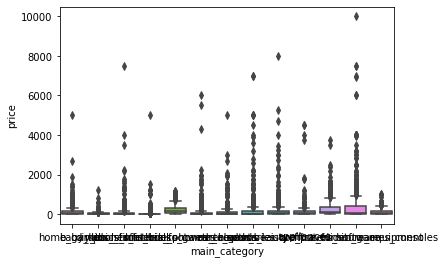

In [23]:
import seaborn as sns
sns.boxplot(x='main_category', y='price', data=fb_df)

In [69]:
X = fb_df['main_category']
y = fb_df['price']

X

1                home_garden
2                home_garden
3                home_garden
4                home_garden
5                home_garden
                ...         
8085    video_games_consoles
8086    video_games_consoles
8088    video_games_consoles
8089    video_games_consoles
8090    video_games_consoles
Name: main_category, Length: 7010, dtype: object

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)
X_train



2759            sports_leisure_travel
7922             video_games_consoles
4321          music_films_books_games
4623          music_films_books_games
5198               computers_software
                    ...              
1056                  baby_kids_stuff
5855    phones_mobile_phones_telecoms
4444          music_films_books_games
271                       home_garden
5797    phones_mobile_phones_telecoms
Name: main_category, Length: 4907, dtype: object

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words= 'english').fit(X_train)
df_train = pd.DataFrame(cvec.transform(X_train).todense(),
                            columns=cvec.get_feature_names_out())

In [59]:
df_test = pd.DataFrame(cvec.transform(X_test).todense(),
                            columns=cvec.get_feature_names_out())
print(df_train.shape)
print(y_train.shape)
print(df_test.shape)
print(y_test.shape)

(4907, 13)
(4907,)
(2103, 13)
(2103,)


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression()
lm.fit(df_train, y_train)
lm.score(df_test, y_test)
#y_pred = lm.predict(X_test)

0.04152462021342673

In [61]:
y_pred = lm.predict(df_test)

# The coefficients
print("Coefficients: \n", lm.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-1.32240253e+14 -1.32240253e+14 -1.32240253e+14 -1.32240253e+14
 -1.32240253e+14 -1.32240253e+14 -1.32240253e+14 -1.32240253e+14
 -1.32240253e+14 -1.32240253e+14 -1.32240253e+14 -1.32240253e+14
 -1.32240253e+14]
Mean squared error: 307299.58
Coefficient of determination: 0.04


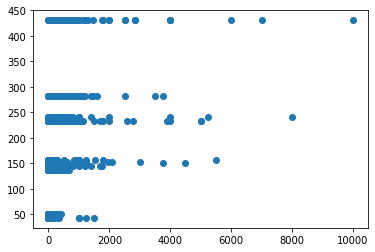

In [67]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

In [ ]:
#result with product_name
#Coefficients: 
# [-114.6611036 -184.6611036 -184.4611036 ... -125.6611036 -160.6611036
# -165.6611036]
#Mean squared error: 312604.47
#Coefficient of determination: 0.02

#result with product_description
#Coefficients: 
# [-174.32112853 -176.32112853 -136.32112853 ... -168.32112853 -181.32112853
# -126.32112853]
#Mean squared error: 313237.48
#Coefficient of determination: 0.02

#result with location
#Coefficients: 
# [1.21784284e+14 1.21784284e+14 1.21784284e+14 ... 1.21784284e+14
# 1.21784284e+14 1.21784284e+14]
#Mean squared error: 1706705503531225766334300160.00
#Coefficient of determination: -5323258916010414047232.00

#result with main_category
#Coefficients: 
# [-1.32240253e+14 -1.32240253e+14 -1.32240253e+14 -1.32240253e+14
# -1.32240253e+14 -1.32240253e+14 -1.32240253e+14 -1.32240253e+14
# -1.32240253e+14 -1.32240253e+14 -1.32240253e+14 -1.32240253e+14
# -1.32240253e+14]
#Mean squared error: 307299.58
#Coefficient of determination: 0.04

In [62]:
fb_df

,id,product_name,category,product_description,price,location,main_category
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,mirror_wall_art_in_wokingham_berkshire_gumtree,home_garden_dining_living_room_furniture_mirro...,mirror_wall_art_posted_by_nisha_in_dining_livi...,5.0,wokingham_berkshire,home_garden
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,stainless_steel_food_steamer_in_inverness_high...,home_garden_other_household_goods,morphy_richard_s_model_no_48755_stainless_stee...,20.0,inverness_highland,home_garden
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,sun_loungers_in_skegness_lincolnshire_gumtree,home_garden_garden_patio_outdoor_settings_furn...,i_have_2_of_these_collection_only_as_i_don_t_d...,20.0,skegness_lincolnshire,home_garden
4,59948726-29be-4b35-ade5-bb2fd7331856,coffee_side_table_from_ammunition_ammo_box_hai...,home_garden_dining_living_room_furniture_other,great_reclaimed_army_ammunition_box_used_as_co...,115.0,radstock_somerset,home_garden
5,16dbc860-696e-4cda-93f6-4dd4926573fb,modern_shannon_sofa_for_sale_at_low_cost_in_de...,home_garden_dining_living_room_furniture_sofas...,new_design_shannon_corner_sofa_5_seater_availa...,450.0,delph_manchester,home_garden
...,...,...,...,...,...,...,...
8085,c4148656-78a9-4f3e-b393-134fdc5ef900,sony_playstation_vr_move_bundle_in_acocks_gree...,video_games_consoles_consoles_ps4_sony_playsta...,sony_playstation_vr_move_bundle353cash_on_coll...,260.0,acocks_green_west_midlands,video_games_consoles
8086,564e3411-768d-4250-a624-b119d696f103,playstation_vr_v2_bundle_in_acocks_green_west_...,video_games_consoles_consoles_ps4_sony_playsta...,playstation_vr_v2_bundle355cash_on_collection_...,235.0,acocks_green_west_midlands,video_games_consoles
8088,2b0a652b-46a2-4297-b619-5efeeb222787,oculus_quest_2_256gb_in_montrose_angus_gumtree,video_games_consoles_other_video_games_consoles,pick_up_only_250comes_with_two_pistols_stocks_...,250.0,montrose_angus,video_games_consoles
8089,719fd40a-870e-4144-b324-55dff2e66fb4,logitech_driving_force_shifter_in_carrickfergu...,video_games_consoles_video_game_accessories_ot...,bought_at_christmas_from_currys_retailing_at_4...,30.0,carrickfergus_county_antrim,video_games_consoles


In [64]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geocoder = Nominatim(user_agent='GetLoc')
geocode = RateLimiter(geocoder.geocode, min_delay_seconds=0.3, return_value_on_exception=None)
#location = geocode.reverse(, timeout=10, language='en')
fb_df['geo_location'] = fb_df['location'].apply(geocode)
fb_df['longiude_latitude'] = fb_df['geo_location'].apply(
    lambda loc: tuple(loc.point) if loc else None)


RateLimiter caught an error, retrying (0/2 tries). Called with (*('north_west_london_london',), **{}).
Traceback (most recent call last):
  File "/home/shah/miniconda3/envs/selenium_project/lib/python3.9/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/home/shah/miniconda3/envs/selenium_project/lib/python3.9/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/home/shah/miniconda3/envs/selenium_project/lib/python3.9/http/client.py", line 1377, in getresponse
    response.begin()
  File "/home/shah/miniconda3/envs/selenium_project/lib/python3.9/http/client.py", line 320, in begin
    version, status, reason = self._read_status()
  File "/home/shah/miniconda3/envs/selenium_project/lib/python3.9/http/client.py", line 281, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/home/shah/miniconda3

In [65]:
fb_df

,id,product_name,category,product_description,price,location,main_category,geo_location,longiude_latitude
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,mirror_wall_art_in_wokingham_berkshire_gumtree,home_garden_dining_living_room_furniture_mirro...,mirror_wall_art_posted_by_nisha_in_dining_livi...,5.0,wokingham_berkshire,home_garden,"(Berkshire, Reading, South East England, Engla...","(51.453488899999996, -1.0318729593399247, 0.0)"
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,stainless_steel_food_steamer_in_inverness_high...,home_garden_other_household_goods,morphy_richard_s_model_no_48755_stainless_stee...,20.0,inverness_highland,home_garden,"(Inverness, Highland, Alba / Scotland, IV1 1PQ...","(57.4790124, -4.225739, 0.0)"
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,sun_loungers_in_skegness_lincolnshire_gumtree,home_garden_garden_patio_outdoor_settings_furn...,i_have_2_of_these_collection_only_as_i_don_t_d...,20.0,skegness_lincolnshire,home_garden,"(Skegness, East Lindsey, Lincolnshire, East Mi...","(53.150227799999996, 0.32909339328596654, 0.0)"
4,59948726-29be-4b35-ade5-bb2fd7331856,coffee_side_table_from_ammunition_ammo_box_hai...,home_garden_dining_living_room_furniture_other,great_reclaimed_army_ammunition_box_used_as_co...,115.0,radstock_somerset,home_garden,"(Radstock, Bath and North East Somerset, South...","(51.2919489, -2.4476231, 0.0)"
5,16dbc860-696e-4cda-93f6-4dd4926573fb,modern_shannon_sofa_for_sale_at_low_cost_in_de...,home_garden_dining_living_room_furniture_sofas...,new_design_shannon_corner_sofa_5_seater_availa...,450.0,delph_manchester,home_garden,"(Delph, Oldham, Greater Manchester, England, O...","(53.5683549, -2.026164, 0.0)"
...,...,...,...,...,...,...,...,...,...
8085,c4148656-78a9-4f3e-b393-134fdc5ef900,sony_playstation_vr_move_bundle_in_acocks_gree...,video_games_consoles_consoles_ps4_sony_playsta...,sony_playstation_vr_move_bundle353cash_on_coll...,260.0,acocks_green_west_midlands,video_games_consoles,"(Acocks Green, Great Western Court, Acocks Gre...","(52.4495299, -1.8192378, 0.0)"
8086,564e3411-768d-4250-a624-b119d696f103,playstation_vr_v2_bundle_in_acocks_green_west_...,video_games_consoles_consoles_ps4_sony_playsta...,playstation_vr_v2_bundle355cash_on_collection_...,235.0,acocks_green_west_midlands,video_games_consoles,"(Acocks Green, Great Western Court, Acocks Gre...","(52.4495299, -1.8192378, 0.0)"
8088,2b0a652b-46a2-4297-b619-5efeeb222787,oculus_quest_2_256gb_in_montrose_angus_gumtree,video_games_consoles_other_video_games_consoles,pick_up_only_250comes_with_two_pistols_stocks_...,250.0,montrose_angus,video_games_consoles,"(Montrose, Angus, Alba / Scotland, DD10 8JE, U...","(56.7114295, -2.4681544, 0.0)"
8089,719fd40a-870e-4144-b324-55dff2e66fb4,logitech_driving_force_shifter_in_carrickfergu...,video_games_consoles_video_game_accessories_ot...,bought_at_christmas_from_currys_retailing_at_4...,30.0,carrickfergus_county_antrim,video_games_consoles,"(Carrickfergus, County Antrim, Ulster, Norther...","(54.7136165, -5.8073112, 0.0)"


In [66]:
save_path = "data/cleaned_tabular.json"
clean_data = fb_df
clean_data = clean_data.to_json(save_path)